In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Vaibhav Rakhude\Desktop\Data Science\Linear Regression\NewspaperData.csv')

In [3]:
df

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [4]:
#Newspaper column consists of nominal data, never use such type of data, its not gonna help your model.
#Newspaper column is not also contributing towards our target column.
#For our analysis only daily and sunday column is valuable.

In [5]:
df = df[['daily','sunday']]

In [6]:
df

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [7]:
#here daily column is our independent column and sunday column is target one.

In [8]:
df.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [9]:
#Here mean value is greater than median value. Therefore we can say there is positive skewness.
#Below graph shows you the skewness.

<AxesSubplot:xlabel='daily', ylabel='Density'>

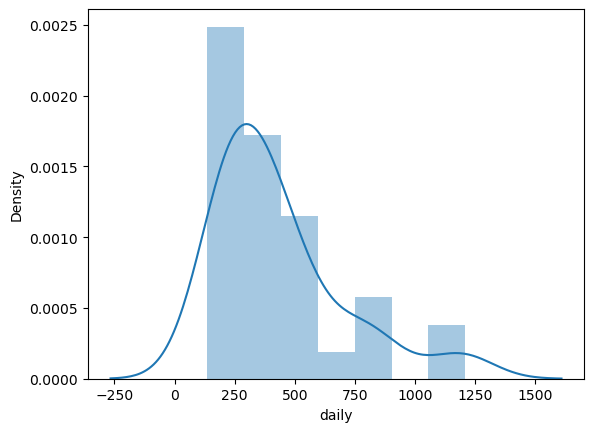

In [10]:
sns.distplot(df['daily'])

<AxesSubplot:xlabel='sunday', ylabel='Density'>

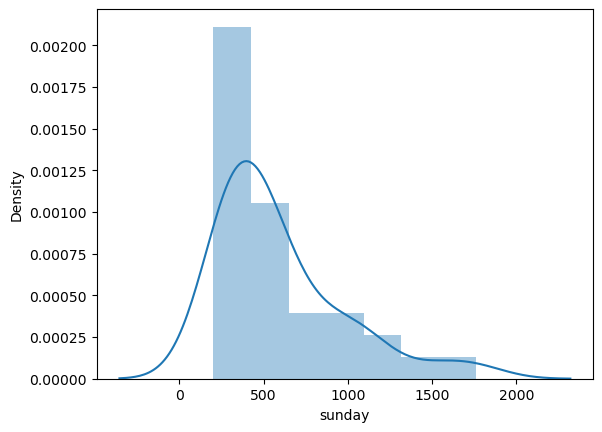

In [11]:
sns.distplot(df['sunday'])

In [12]:
df['sunday'].skew()

1.5644730738925112

In [13]:
#If the skewness value is less than -1 or greater than +1, then we'll have very high amt of skewness.
#If the skewness value is present between -0.5 and 0.5, then we'll have moderate amount of skewness.
#If the skewness value is greater than -0.5 or less than 0.5, then we can ignore that amount of skewness.

# How to convert Skewness into Normal dist

In [14]:
#To get into that, first we need to check the correlation between two columns

In [15]:
df.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [16]:
#Here we can see that (daily,sunday) and (sunday,daily) have very strong relationship. 
#That is, Independent column is highly related to Target column. They both have strong relation. 
#We can also say that Independent column is highly affecting the Target column.
#Therefore we can use Daily column to predict the Sunday column.

<AxesSubplot:>

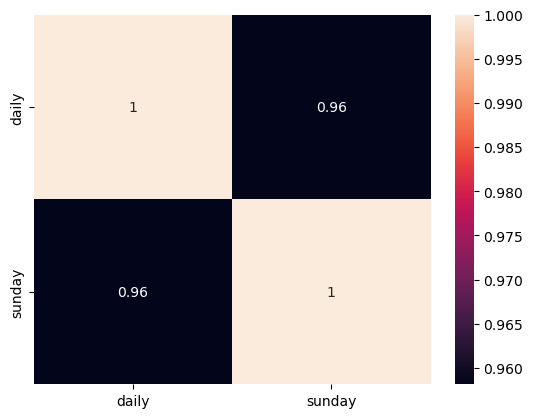

In [17]:
sns.heatmap(df.corr(), annot=True)
#Gives the visual representation of the correlation. 96% correlation is shown.

# Important Libraries to import.

In [18]:
import statsmodels.formula.api as smf

In [19]:
#Here ols stands for Ordinary Least Square.
#ols function allows us to implement Linear regression.
#Inside ols, we need to pass three things,(Target column, Independent column, Dataset)
#First column name that youll pass we always be treated as your Target column.
#before the ~ symbol, Target column , after the ~ symbol, Independent columns

#.fit() value is responsible to get your m and c value. i.e. slope and intercept value
#Without .fit() our model will not do any calculations.

In [20]:
model = smf.ols('sunday~daily', data=df).fit() 

In [ ]:
#unless and unitl we dont save our model into some variable, we wont be able to get the values. 
#In our case 'model' is our variable.

In [21]:
model

In [22]:
#Now m and c values are stored in our variable called model. 
#smf.ols just stores the values of m and c in a variable. 
#In our case we have stored 

# Model Parameters

In [23]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [24]:
#Here we got the m and c values now let us compute them in our equation y=mx+c
#Suppose we have our daily consumption data as X=250 newspaper, we can compute the y value manually.

In [25]:
x = 250 

y = 1.339715*x + 13.835630

In [26]:
y

348.76437999999996

In [27]:
#Here we can conclude that if our daily consumption of newspaper is 250 then our sunday consumption will be 348.764

# Now we have to compute p values as well as t values

In [28]:
print(model.tvalues)
print(model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64
Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [29]:
#pvalues and tvalues for intercept and daily will be given.
#Here we are calculating p and t values because in linear regression also we have hypothesis part. 

#According to our problem statement:
#Null Hypothesis: beta0 = 0
#Alternate Hypothesis: beta1 =! 0

#Always remember, In linear regression we are searching for Alternate Hypo. since beta1 must not be equal to zero 
#If there would be a case where beta = 0, then this training data won't affect the target data, hence its of no use. 
#Again whether to choose null or alternate hypothesis depends on your problem statement. 

In [30]:
#Now let's go for r2 values

In [31]:
model.rsquared

0.9180596895873295

In [ ]:
#here we've got 91% accuracy. R2 value measures the accuracy of the model.

# Prediction of new data 

In [ ]:
#While predicting the the target values, we only need to pass independent values.
#So let us create some random values for our 'daily' column dataset and predict the values for our 'target data set'

In [32]:
newdf = pd.DataFrame({'daily': [500,650,250,180,300]})

In [33]:
newdf

,daily
0,500
1,650
2,250
3,180
4,300


In [34]:
model.predict(newdf) 

0    683.693009
1    884.650222
2    348.764319
3    254.984286
4    415.750057
dtype: float64

In [35]:
#This model gives the predicted 'sunday' values based on random 'daily' values.
#According to the prediction we can say that if the sunday edition is more than daily edition. the company will launch newspaper

# Data Transformation

In [ ]:
#Data Transformation is mainly done to remove the skewness out of the graph and get a normally distributed graph.

In [37]:
#The above above model is built without doing any data transformation 
#There are two ways of doing data tranformation 
#1) Log transformation and 
#2) sqrt transformation
#we can choose any trans. But log transformation is used widely since it gives more normally distributed graph.

In [47]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

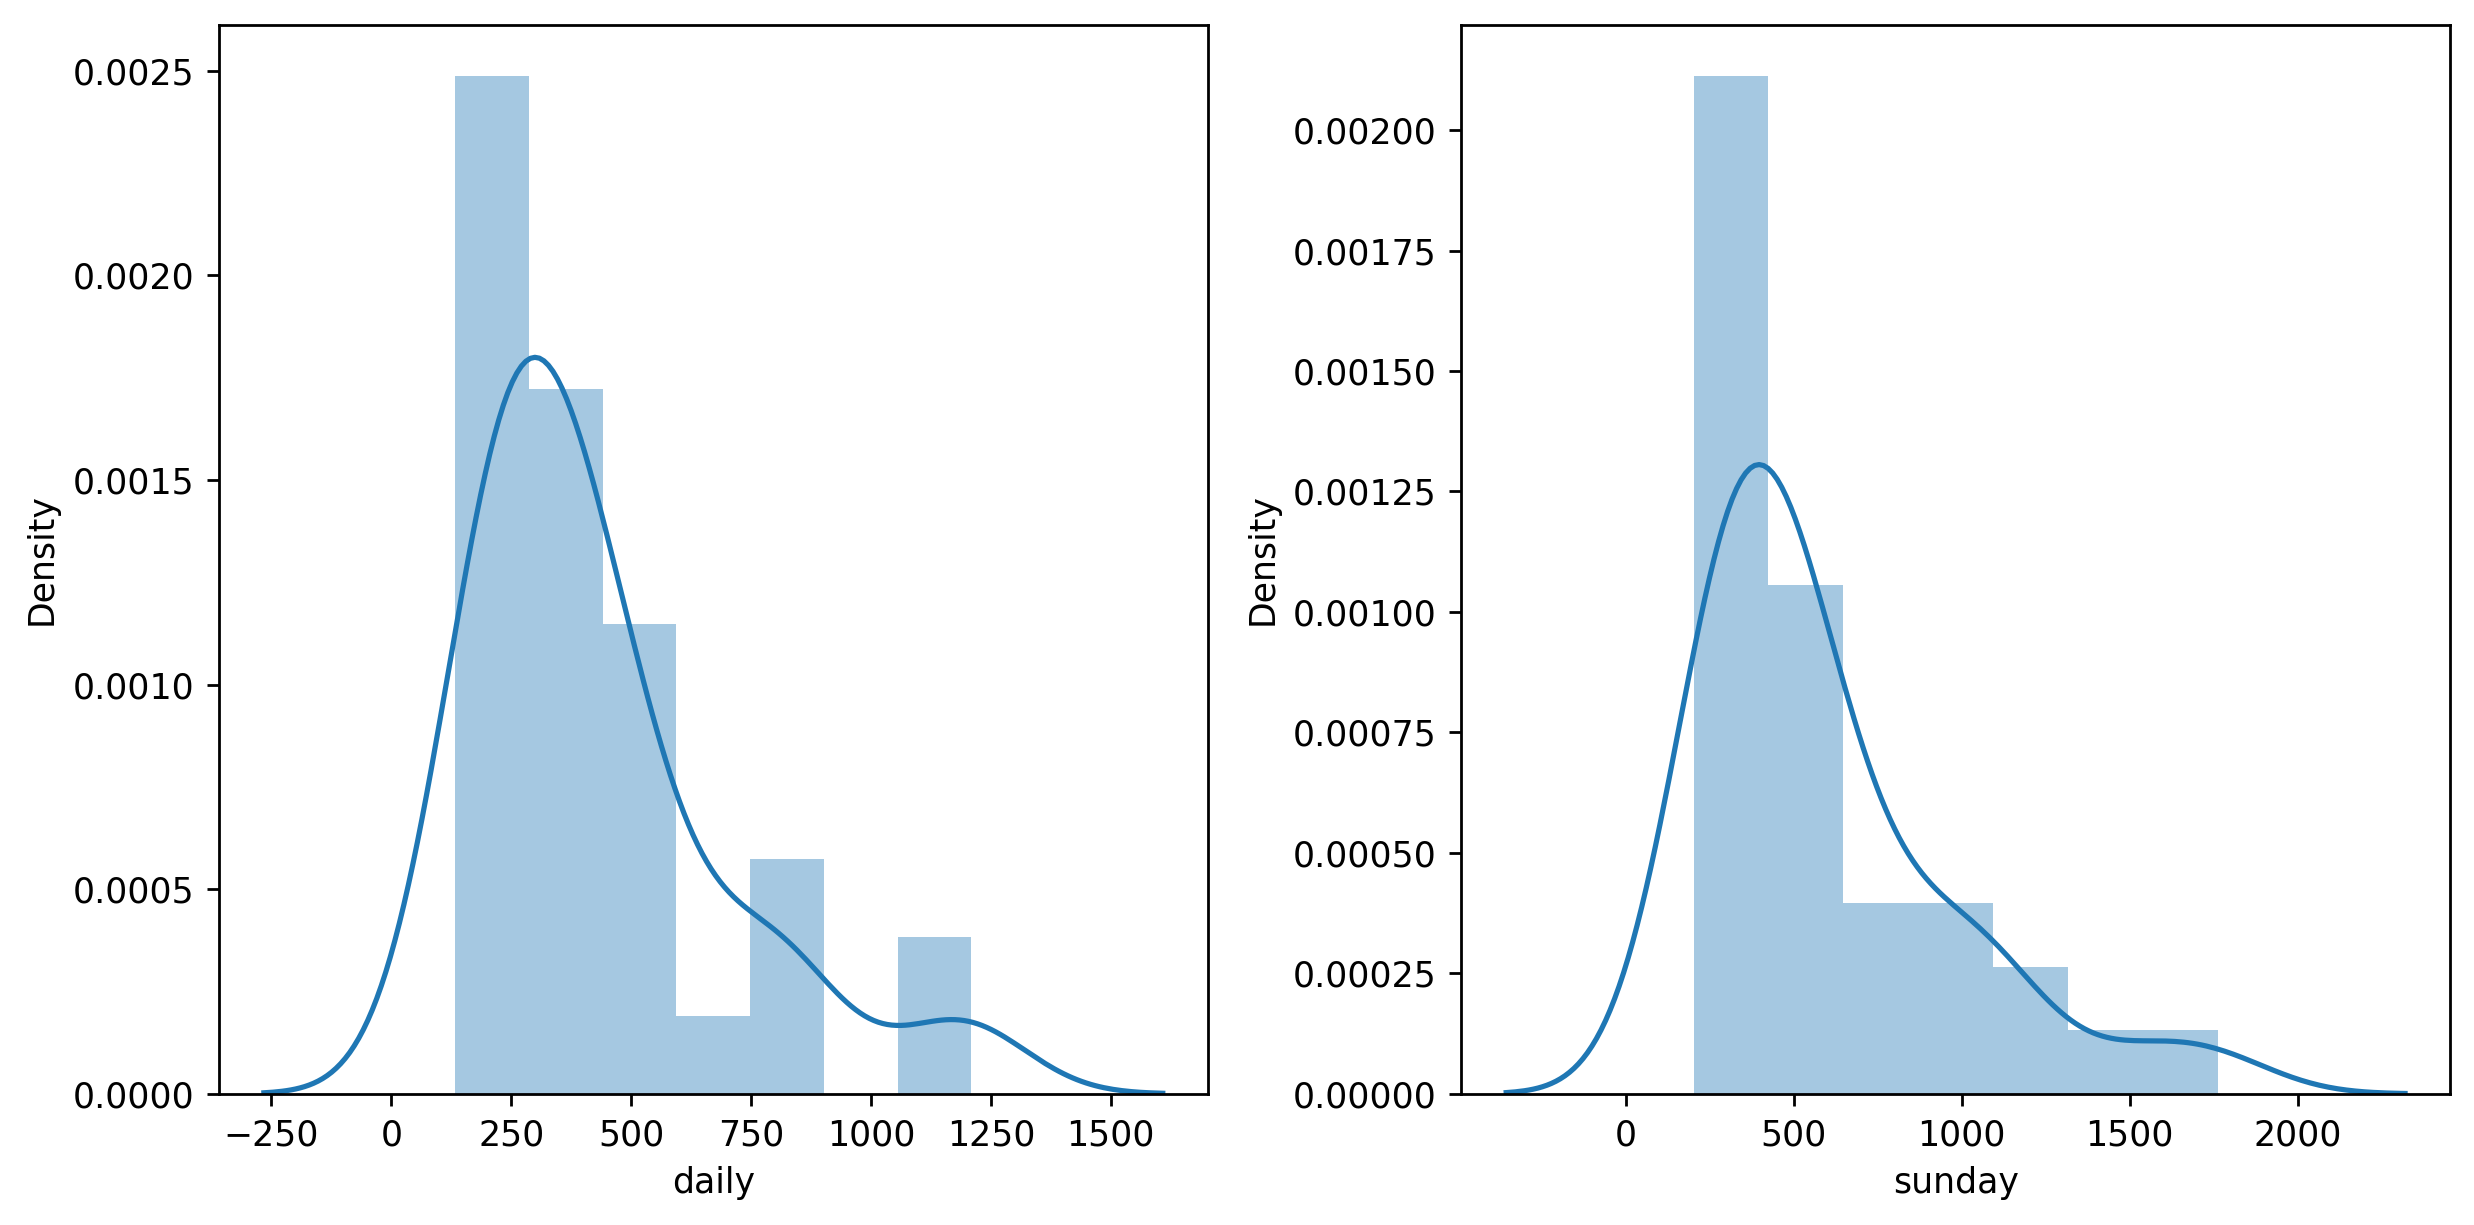

In [48]:
plt.subplot(1,2,1)
sns.distplot(df['daily'])

plt.subplot(1,2,2)
sns.distplot(df['sunday'])
plt.tight_layout()

In [49]:
#This is our original data where huge amount of skewness is present.

# Log Transformation

In [50]:
df['log_daily'] = np.log(df['daily']) #Numpy has a built-in function np.log

In [51]:
df.head()

,daily,sunday,log_daily,log_sunday
0,391.952,488.506,5.971139,6.191352
1,516.981,798.298,6.248006,6.682482
2,355.628,235.084,5.873885,5.459943
3,238.555,299.451,5.474600,5.701951
4,537.780,559.093,6.287450,6.326316


In [52]:
df['log_sunday'] = np.log(df['sunday']) 
df.head()

,daily,sunday,log_daily,log_sunday
0,391.952,488.506,5.971139,6.191352
1,516.981,798.298,6.248006,6.682482
2,355.628,235.084,5.873885,5.459943
3,238.555,299.451,5.474600,5.701951
4,537.780,559.093,6.287450,6.326316


In [53]:
#Now we'll plot distribution plot for log daily and log sunday.

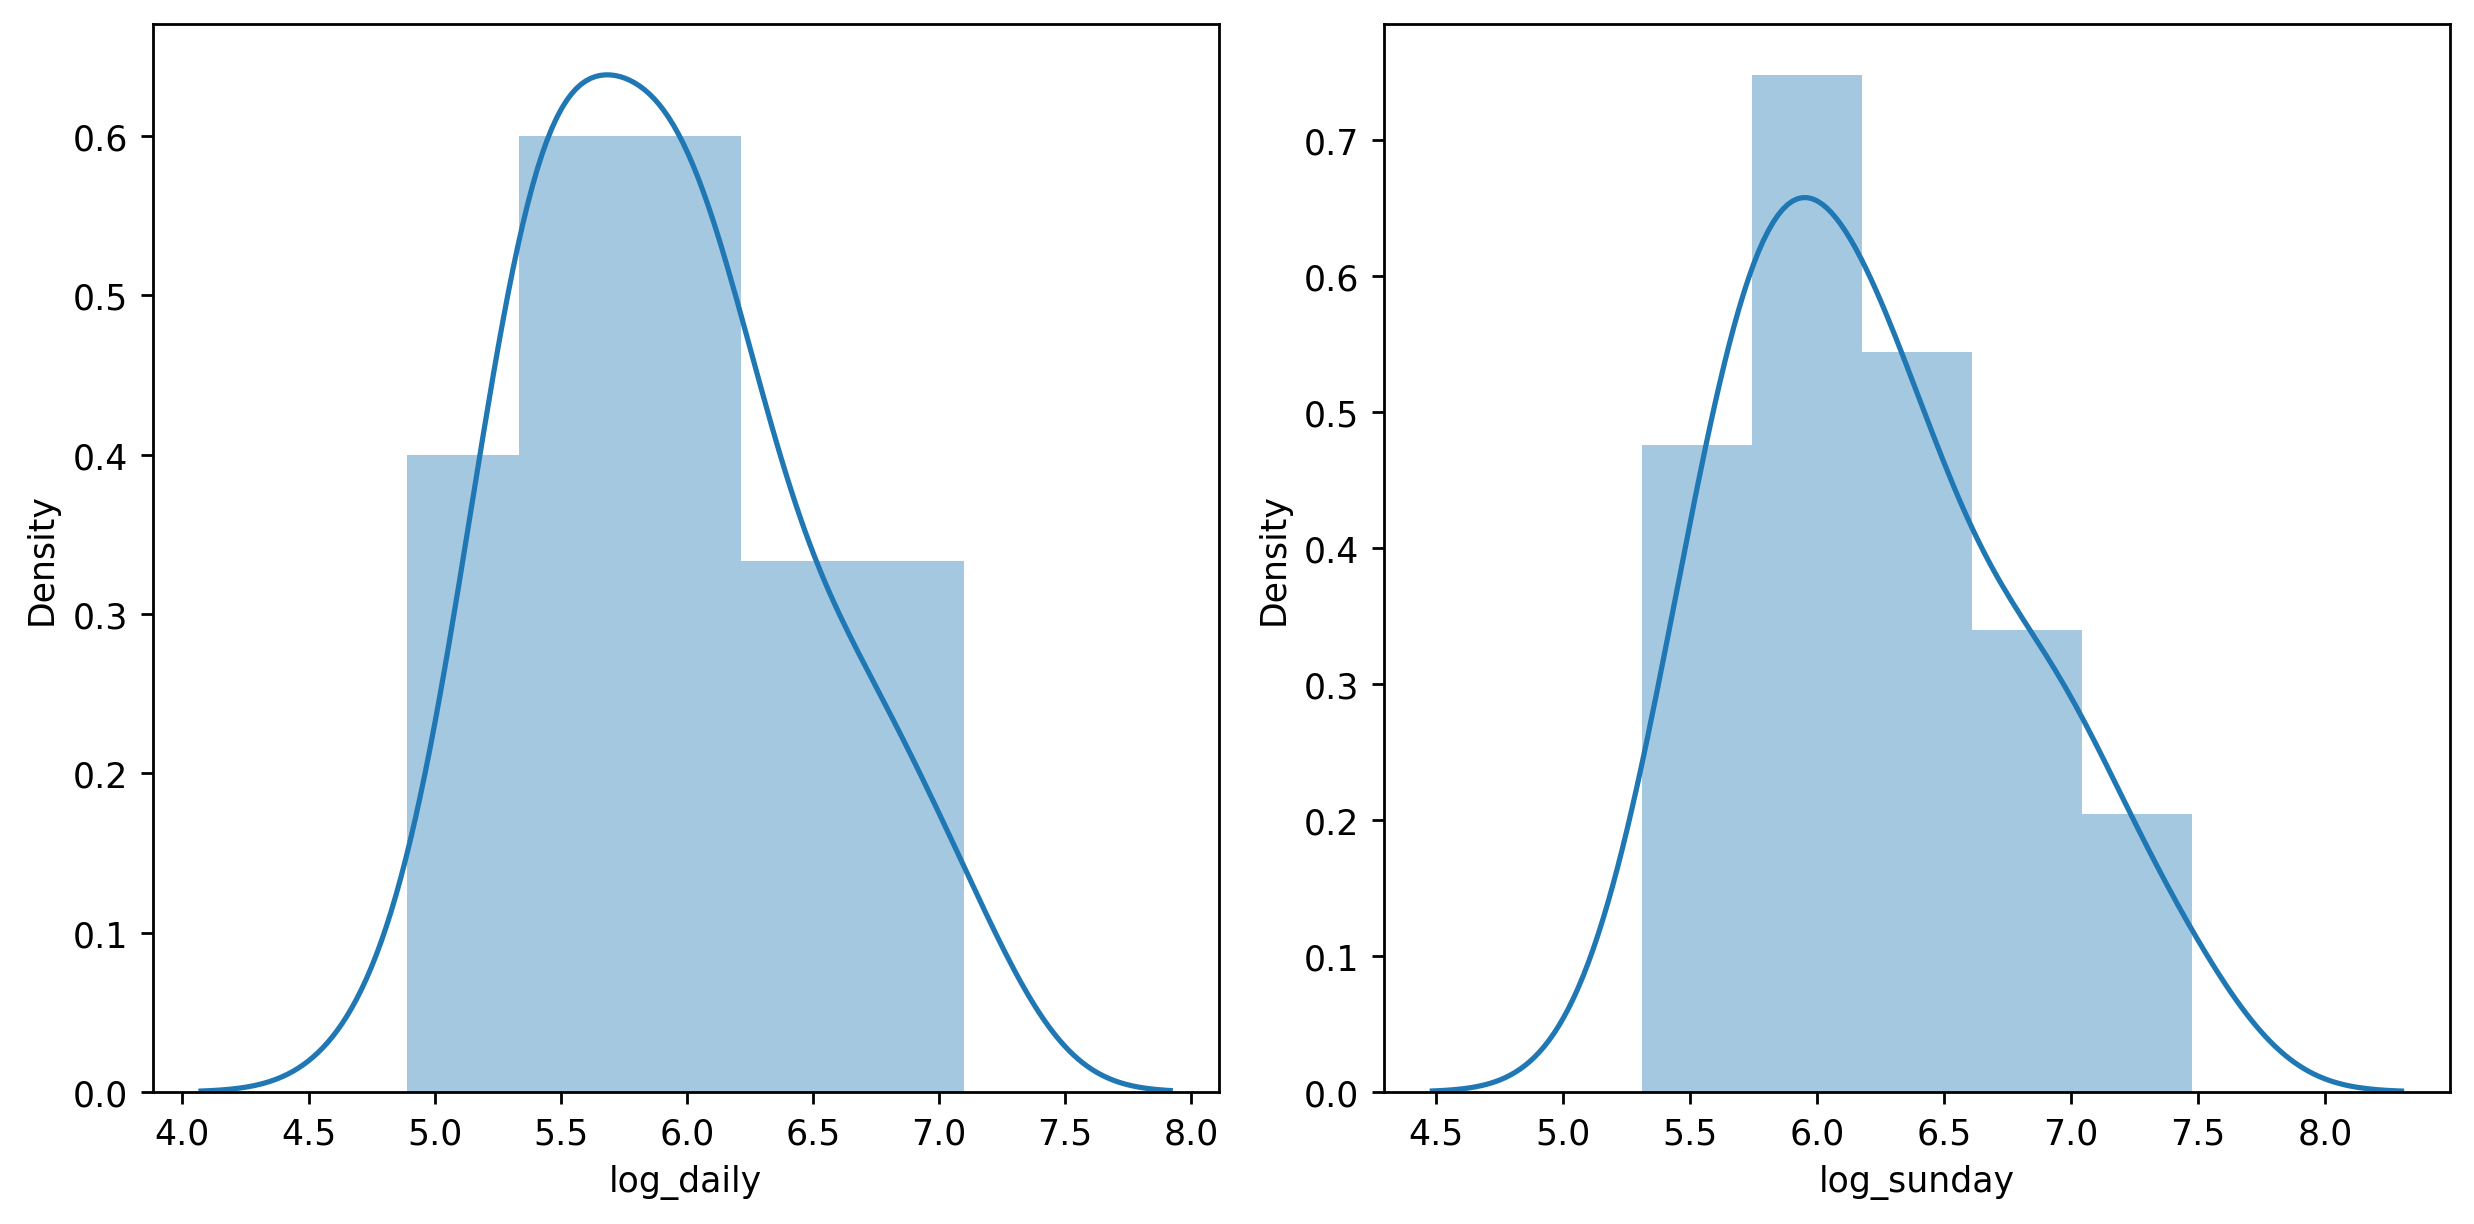

In [54]:
plt.subplot(1,2,1) # 1 row, 2 column and first graph in 1st column.
sns.distplot(df['log_daily'])

plt.subplot(1,2,2) # 1 row, 2 column and second graph in 2nd column.
sns.distplot(df['log_sunday'])
plt.tight_layout()

In [ ]:
#Now we'll get Normally Distributed graph. Skewness is removed. 
#Even while building final model, we'll use these transformed values i.e. log_daily and log_sunday.